# Decision Trees

## Introduction

Decision trees methods for regression or classification involve stratifying or segmenting the predictor space into a number of simple regions.

To make a prediction for a given observation, we usually use mean or the mode of the training observations in the region to which it belongs. In other words, we take the mean or the mode response value for the tranining observations in the region. 

The tree basically stratifies or segments the predictor space.

The following example is from the book "An Introduction to Statistical Learning" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.

The figure represent a regression tree applied to the `Hitters` dataset. The response variable is `Salary` and the predictor variables are `Years` and `Hits`.

![](tree.JPG)

The way a tree is contructed is by recursively partitioning the feature space into a number of regions. As we can see, at each internal node of the tree, there's a label indicating a rule that split the data $(X_j < t_k)$. This rule is based on a feature $X_j$ and a threshold $t_k$. The data is then split into two regions, the left region where the rule $(X_j < t_k)$ is true and the right region where the rule is false, where $X_j > t_k$. 

The example has two internal nodes (Years < 4.5 and Hits < 117.3) and three terminal nodes (or leaves). The terminal nodes are the regions, defined as $R_1, R_2, R_3$ The segments of the tree that connect the nodes are called branches. 

![](segmentation_fspace.JPG)


## How do we construct the tree?

As we see in the example, we divide the feature space ($X_1, X_2, ..., X_p$) into $J$ distinct and non-overlapping regions, $R_1, R_2, ..., R_J$. For every observation that falls into the region $R_j$, we make the same prediction, which is simply the mean of the response values for the training observations in $R_j$. In the case of our example, the mean is calculated for the log-salary of the players in the region.

Regions are defined as high-dimensional rectangles. Each region $R_j$ is a high-dimensional rectangle because it's defined by intervals for each predictor variable. For three features, the region $R_j$ is a 3-dimensional space constrained by the intervals defined for each feature.

Our objective is to find the regions $R_1, R_2, ..., R_J$ that minimize the residual sum of squares (RSS), given by the formula:

$$RSS = \sum_{j=1}^{J} \sum_{i \in R_j} (y_i - \hat{y}_{R_j})^2$$

Where $\hat{y}_{R_j}$ is the mean response for the training observations in region $R_j$.

Considering every possible partition of hte feature space into J boxes is computationally infeasible. To build decision trees, we use a top-down, greedy approach called recursive binary splitting. 

The recursive binary splitting starts at the top of the tree (root node) where all observations belong to a single region, and then pregressively splits the predictor space, creating new branches and nodes. At each step, it's greedy because it choosed the best split at that particular step, rather than looking ahead and picking a split that will lead to a better tree in some future step. The select feature and threshold choosen is one that leads to the greatest reduction in RSS. The process continues until a stopping criterion is reached, such as a maximum tree depth or a minimum number of observations in each region.

Once the regions are defined, we can predict the response for a given observation by using the mean of the training observations in the region to which it belongs.

## A tree overfit the data. Pruning idea

The tree that we describe is likely to overfit the data. This means that the model produces good predictions on the training data, but produces poor predictions on new data. The tree is too complex and captures noise in the training data. So a simple tree, with fewer splits and fewer regions, is likely to be more interpretable and generalizable.

We can build the tree only as long as the decrease in the RSS from each split exceeds a threshold. This is pruning. The idea is to grow a large tree and then prune it back to obtain a subtree that minimizes the cross-validated error.

 However, estimating the cross-validation error for every possible subtree is impractical due to the enormous number of potential subtrees. Instead, we use a method called cost complexity pruning, which allows us to consider a manageable set of subtrees. 
 
 We want to simplify a large tree $T_0$ by pruning it to create smaller subtrees. $\alpha$ is a nonnegative value that controls the balance between the complexity of the tree and its fit to the training data. Each subtree in this sequence is indexed by a different value of the parameter $\alpha$.

 The goal is to minimize the objective function. For each value of $\alpha$, we obtain the subtree $T \in T_0$ that minimizes the equation:

$$\sum_{m=1}^{|T|} \sum_{i \in R_m} (y_i - \hat{y}_{R_m})^2 + \alpha |T|$$

Where $|T|$ is the number of terminal nodes in the tree $T$, $R_m$ is the region corresponding to the $m$-th terminal node, and $\hat{y}_{R_m}$ is the mean of the response for the training observations in $R_m$.

When $\alpha = 0$, the objective function only considers the sum of squared errors, leading to the largest tree $T_0$ since there 's no penalty for complexity. As $\alpha$ increases, the penalty for complexity increases, leading to smaller trees.

To find the optimal subtree, we use cross-validation to determine the best value of $\alpha$. This value is the one that minimizes the cross-validated error. Once we have selected the optima value of $\alpha$, we return to the full dataset and prune the tree $T_0$ according to this value, obtaining the corresponding optimal subtree.

# Predicting Baseball Player's Salary

This dataset is part of the R-package ISLR and is used in the related book by G. James et al. (2013) "An Introduction to Statistical Learning with applications in R" 

I'm going to use the dataset to explain and understand based-tree models. The goal is to predict the baseball player's salary based on 20 features. There are 322 observations in the dataset.


## Features Information:

| Feature     | Description                                                      |
|-------------|------------------------------------------------------------------|
| AtBat       | Number of times at bat in 1986                                   |
| Hits        | Number of hits in 1986                                           |
| HmRun       | Number of home runs in 1986                                      |
| Runs        | Number of runs in 1986                                           |
| RBI         | Number of runs batted in in 1986                                 |
| Walks       | Number of walks in 1986                                          |
| Years       | Number of years in the major leagues                             |
| CAtBat      | Number of times at bat during his career                         |
| CHits       | Number of hits during his career                                 |
| CHmRun      | Number of home runs during his career                            |
| CRuns       | Number of runs during his career                                 |
| CRBI        | Number of runs batted in during his career                       |
| CWalks      | Number of walks during his career                                |
| League      | A factor with levels A and N indicating player’s league at the end of 1986 |
| Division    | A factor with levels E and W indicating player’s division at the end of 1986 |
| PutOuts     | Number of put outs in 1986                                       |
| Assists     | Number of assists in 1986                                        |
| Errors      | Number of errors in 1986                                         |
| Salary      | 1987 annual salary on opening day in thousands of dollars        |
| NewLeague   | A factor with levels A and N indicating player’s league at the beginning of 1987 |


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 50
pd.options.display.max_rows = 50
pd.options.display.max_info_columns = 70

In [82]:
data = pd.read_csv('Hitters.csv')
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


We have 59 missing values in the Salary. We are going to drop these observations.

In [83]:
data.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [84]:
# Drop rows with missing values
data = data.dropna()

In [86]:
# categorical features
cat_feat = [col for col in data.columns if data[col].dtype == 'O']

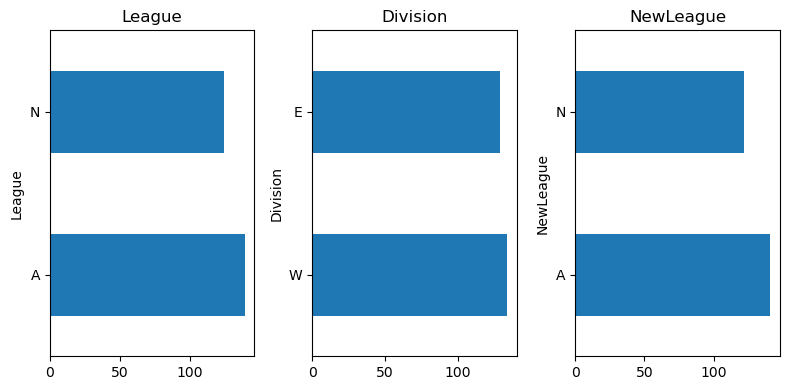

In [87]:
# Distribution of categorical features
plt.figure(figsize=(8, 4))
for i, col in enumerate(cat_feat):
    plt.subplot(1, 3, i+1)
    data[col].value_counts().plot.barh()
    plt.title(col)
plt.tight_layout()
plt.show()

We are going to OHE the categorical features

In [88]:
data = pd.get_dummies(data, columns=cat_feat, drop_first=False)

The histogram of the salary variable is clearly right-skewed with a long tail. This is a commmon scenario in salary prediction problems and where a log transformation is usually applied. 

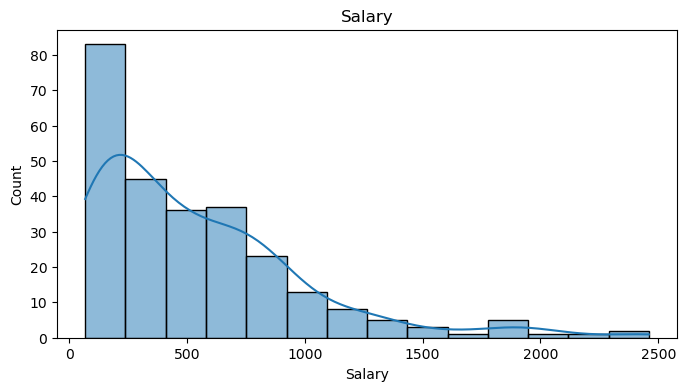

In [89]:
# salary plot
plt.figure(figsize=(8, 4))
sns.histplot(data.Salary, kde=True)
plt.title('Salary')
plt.show()

In [90]:
# descriptive statistics for Salaray
data.Salary.describe()

count     263.000000
mean      535.925882
std       451.118681
min        67.500000
25%       190.000000
50%       425.000000
75%       750.000000
max      2460.000000
Name: Salary, dtype: float64

In [91]:
# log transformation
data['LogSalary'] = np.log1p(data.Salary)

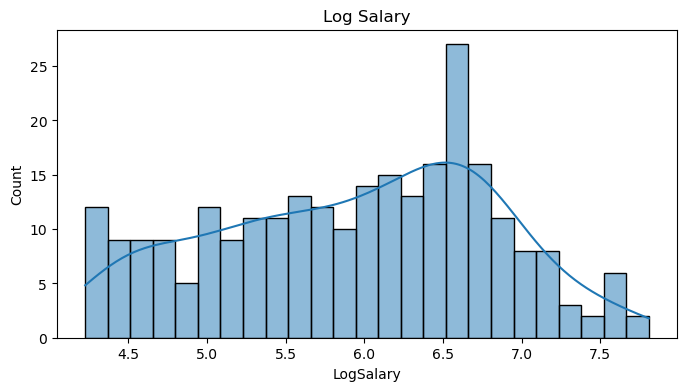

In [93]:
# log salary plot
plt.figure(figsize=(8, 4))
sns.histplot(data.LogSalary, kde=True, bins=25)
plt.title('Log Salary')
plt.show()

Split the data into predictors $X_j$ and target $y$.

In [96]:
X = data.drop(['Salary', 'LogSalary'], axis=1)
y = data.LogSalary
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,False,True,False,True,False,True
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,True,False,False,True,True,False
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,False,True,True,False,False,True
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,False,True,True,False,False,True
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,True,False,False,True,True,False


In [105]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

In [104]:
# Decision tree regressor 5 fold cross validation
tree = DecisionTreeRegressor(random_state=42)

kfolds = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []
for i, (idx_t, idx_v) in enumerate(kfolds.split(X, y)):
    X_t, X_v = X.iloc[idx_t], X.iloc[idx_v]
    y_t, y_v = y.iloc[idx_t], y.iloc[idx_v]
    
    tree.fit(X_t, y_t)
    y_pred = tree.predict(X_v)
    
    mse = np.mean((y_v - y_pred)**2)
    scores.append(mse)
    print(f'Fold {i+1}, MSE: {mse:.2f}')
print(f'Mean MSE: {np.mean(scores):.2f} ± {np.std(scores):.2f}')

Fold 1, MSE: 0.31
Fold 2, MSE: 0.43
Fold 3, MSE: 0.28
Fold 4, MSE: 0.30
Fold 5, MSE: 0.36
Mean MSE: 0.34 ± 0.05


In [124]:
# Decision tree regressor 5 fold cross validation with optimal ccp_alpha
tree = DecisionTreeRegressor(random_state=42)

kfolds = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []
for i, (idx_t, idx_v) in enumerate(kfolds.split(X, y)):
    X_t, X_v = X.iloc[idx_t], X.iloc[idx_v]
    y_t, y_v = y.iloc[idx_t], y.iloc[idx_v]
    
    # Fit a large tree on the training fold
    tree = DecisionTreeRegressor(random_state=42)
    tree.fit(X_t, y_t)
    
    # Get the cost complexity pruning path
    path = tree.cost_complexity_pruning_path(X_t, y_t)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities
    
    # Train trees for each ccp_alpha value and evaluate on validation set
    validation_scores = []
    for ccp_alpha in ccp_alphas:
        pruned_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
        pruned_tree.fit(X_t, y_t)
        y_pred = pruned_tree.predict(X_v)
        mse = np.mean((y_v - y_pred)**2)
        validation_scores.append(mse)

    # Select the optimal alpha that minimizes the validation set error
    optimal_alpha = ccp_alphas[np.argmin(validation_scores)]
    print(f'Optimal alpha for fold {i+1}: {optimal_alpha:.5f}')

    # Fit the tree with the optimal alpha on the training set and evaluate on the validation set
    optimal_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=optimal_alpha)
    optimal_tree.fit(X_t, y_t)
    y_pred = optimal_tree.predict(X_v)
    
    mse = np.mean((y_v - y_pred)**2)
    scores.append(mse)
    print(f'Fold {i+1}, MSE: {mse:.2f}')
print(f'Mean MSE: {np.mean(scores):.2f} ± {np.std(scores):.2f}')
print(f'Mean alpha: {np.mean(optimal_alpha):.5f}')

Optimal alpha for fold 1: 0.01357
Fold 1, MSE: 0.20
Optimal alpha for fold 2: 0.00534
Fold 2, MSE: 0.31
Optimal alpha for fold 3: 0.01367
Fold 3, MSE: 0.21
Optimal alpha for fold 4: 0.00470
Fold 4, MSE: 0.20
Optimal alpha for fold 5: 0.05346
Fold 5, MSE: 0.22
Mean MSE: 0.23 ± 0.04
Mean alpha: 0.05346


In [119]:
from sklearn.model_selection import GridSearchCV

reg = DecisionTreeRegressor(random_state=42)
ccp_path = reg.cost_complexity_pruning_path(X , y)
ccp_alphas, impurities = ccp_path.ccp_alphas, ccp_path.impurities

In [121]:

kfold = KFold(5,shuffle=True ,random_state =42)
grid = GridSearchCV(reg , {'ccp_alpha': ccp_alphas}, 
                    refit=True ,cv=kfold ,scoring='neg_mean_squared_error')
G = grid.fit(X , y)

In [123]:
grid.best_params_

{'ccp_alpha': 0.02415788140918171}

By evaluating each pruned tree on a validation set within each fold, you get an accurate assessment of performance on unseen. Selecting the optimal `ccp_alpha` for each fold individually can potentially adapt better to different subsets of the data.
The con is that is computationally expensive.

Using the GridSearchCV approach simplify the process and if more efficient. 
The con is rather than adapting to each fold individually, the approach finds a single optimal `ccp_alpha`. This might be less flexible but is generally robust


In [132]:
grid.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.02415788140918171, random_state=42)

## Plotting trees

We can plot the tree using the `plot_tree` function from the `sklearn.tree` module. The function takes the fitted model and the feature names as arguments. The function creates a plot of the tree using the `matplotlib` library. 

We can also print in text format the tree using the `export_text` function from the `sklearn.tree` module. The function takes the fitted model and the feature names as arguments. The function creates a text representation of the tree.

In [137]:
from sklearn.tree import plot_tree, export_text
print(export_text(grid.best_estimator_, feature_names=X.columns.to_list(), show_weights=True, max_depth=20))

|--- CAtBat <= 1452.00
|   |--- CHits <= 182.00
|   |   |--- RBI <= 5.50
|   |   |   |--- value: [7.24]
|   |   |--- RBI >  5.50
|   |   |   |--- value: [4.69]
|   |--- CHits >  182.00
|   |   |--- value: [5.48]
|--- CAtBat >  1452.00
|   |--- Hits <= 117.50
|   |   |--- value: [6.16]
|   |--- Hits >  117.50
|   |   |--- value: [6.71]



We can see how effective finding the optimal `ccp_alpha` is pruning the tree. The tree is simpler and more interpretable. 

In the plot tree, the root node is CAtBat (Number of times at bat during his career) and the first split is based on the rule `CAtBat <= 1452.0`. The plot shows the squared error in the split, number of samples, and the value of the node. So for the samples where CAtBat < 1452.0, the algorithm makes another split based on `CHits <= 182` (Number of hits during his career). Again for the samples where this condition is true, the algorithm makes another split based on `RBI <= 5.5` (Number of runs batted in during 1986). Now for the samples where this condition is true, the mean of the response is 7.244 for this region. The same process is repeated for the other regions.

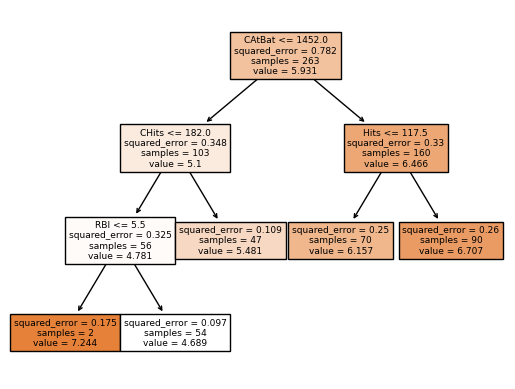

In [139]:
plot_tree(grid.best_estimator_, feature_names=X.columns.to_list(), filled=True)
plt.show()

## Resources:

